In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
#from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import cross_val_score
from scipy.stats import uniform

In [13]:
#reading in data
red = pd.read_csv("data/winequality-red.csv", sep=';')
white = pd.read_csv("data/winequality-white.csv", sep=';')
#adding a column to represent the type of wine for our later experiment with both sets together
red['type'] = 1
white['type'] = 0
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [3]:
#merging data sets
wine = pd.concat([red,white])
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


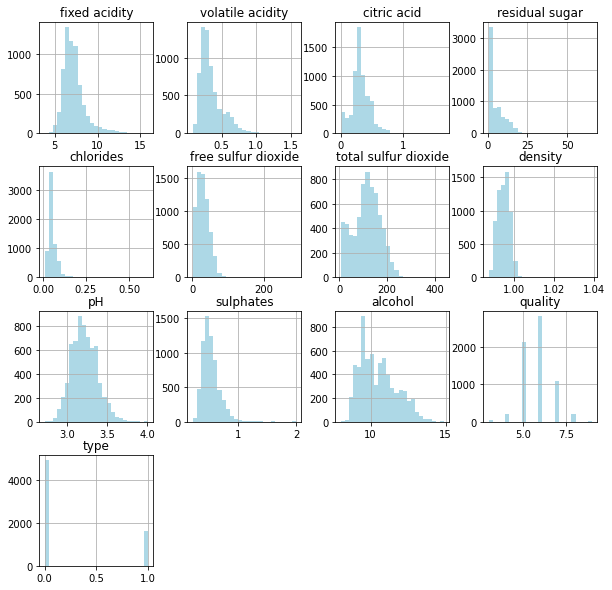

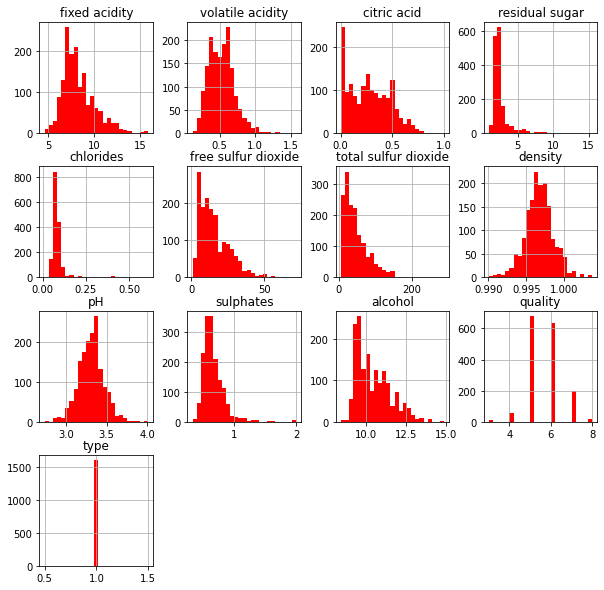

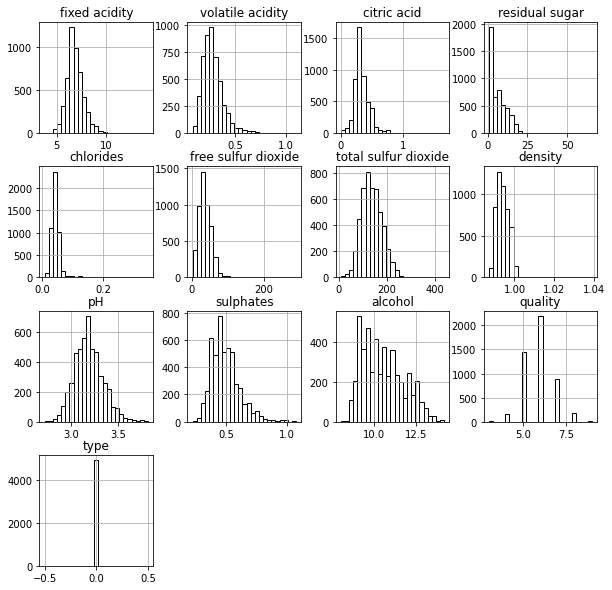

In [4]:
#Both Red and White
wine.hist(bins=25,figsize=(10,10), color = "lightblue")
plt.show()
#Red
red.hist(bins=25,figsize=(10,10), color = "red")
plt.show()
#White
white.hist(bins=25,figsize=(10,10), color = "white", ec="black")
plt.show()

In [5]:
#Separating Features and Targets
features = red.drop(['quality', 'type'], axis=1)
targets = red['quality']
wFeatures = white.drop(['quality', 'type'], axis=1)
wTargets = white['quality']
rwFeatures = wine.drop(['quality', 'type'], axis=1)
rwTargets = wine['quality']

In [6]:
#Test Train Split and scale
X_train, X_test, y_train, y_test = train_test_split(wFeatures, wTargets, test_size=0.2)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [7]:
#Running the Lasso Model
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso = model_lasso.predict(X_train)

print("MSE:", mean_squared_error(y_train,pred_train_lasso))

MSE: 0.5693298391608642


In [8]:
#Running the Ridge Model
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("MSE:",mean_squared_error(y_train,pred_train_rr))

MSE: 0.563741208196381


In [9]:
#Running the RandomForestClassifier Model
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
pred_train_rfc= rfc.predict(X_train)
print("MSE:",mean_squared_error(y_train,pred_train_rfc))

MSE: 0.6990811638591118


In [10]:
#Running the Dummy Regressor
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(X_train, y_train)

pred_train_dummy = dummy_regr.predict(X_train)
print("MSE:", mean_squared_error(y_train,pred_train_dummy))

MSE: 0.8180193976518632


In [11]:
#Cross validation
from sklearn.model_selection import cross_val_score

lasso_scores = cross_val_score(model_lasso, X_train, y_train,scoring='neg_mean_absolute_error', cv=5)
rfc_scores = cross_val_score(rfc, X_train, y_train,scoring='neg_mean_absolute_error', cv=4) #threw error when had cv=5
rr_scores = cross_val_score(rr, X_train, y_train,scoring='neg_mean_absolute_error', cv=5)

print('Mean Score of Lasso =', -lasso_scores.mean().round(5)*100,'%')
print('Mean Score of RFC =', -rfc_scores.mean().round(5)*100,'%')
print('Mean Score of RR =', -rr_scores.mean().round(5)*100,'%')


Mean Score of Lasso = 58.924 %
Mean Score of RFC = 55.13 %
Mean Score of RR = 58.623999999999995 %


In [14]:
def hist_counts_pred(predicted):
    counts_arr =[]
    for i in range(1,9):
        counts_arr.append(np.count_nonzero((predicted == i)))
    return counts_arr

def hist_counts_targ(targets):
    counts_arr =[]
    for i in range(1,9):
        counts_arr.append(np.count_nonzero((targets == i)))
    return counts_arr  


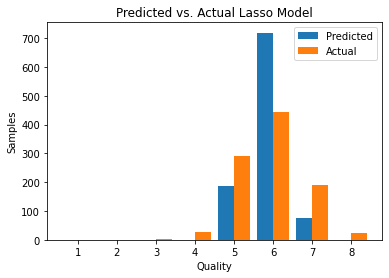

In [15]:
lasso_predicted = np.rint(model_lasso.predict(X_test))
lasso_targets = np.rint(y_test)

pred_counts = hist_counts_pred(lasso_predicted)
targ_count = hist_counts_targ(lasso_targets)

X = [1,2,3,4,5,6,7,8]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, pred_counts, 0.4, label = 'Predicted')
plt.bar(X_axis + 0.2, targ_count, 0.4, label = 'Actual')
  
plt.xticks(X_axis, X)
plt.xlabel("Quality")
plt.ylabel("Samples")
plt.title("Predicted vs. Actual Lasso Model")
plt.legend()
plt.show()

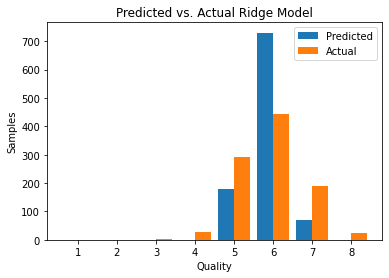

In [16]:
ridge_predicted = np.rint(rr.predict(X_test))
ridge_targets = np.rint(y_test)

pred_counts = hist_counts_pred(ridge_predicted)
targ_count = hist_counts_targ(ridge_targets)

X = [1,2,3,4,5,6,7,8]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, pred_counts, 0.4, label = 'Predicted')
plt.bar(X_axis + 0.2, targ_count, 0.4, label = 'Actual')
  
plt.xticks(X_axis, X)
plt.xlabel("Quality")
plt.ylabel("Samples")
plt.title("Predicted vs. Actual Ridge Model")
plt.legend()
plt.show()

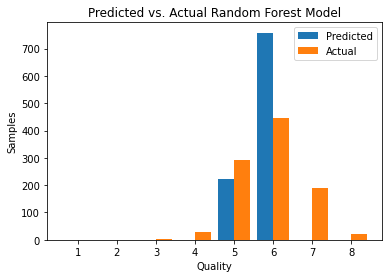

In [19]:
rfc_predicted = rfc.predict(X_test)
rfc_targets = y_test

pred_counts = hist_counts_pred(rfc_predicted)
targ_count = hist_counts_targ(rfc_targets)

X = [1,2,3,4,5,6,7,8]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, pred_counts, 0.4, label = 'Predicted')
plt.bar(X_axis + 0.2, targ_count, 0.4, label = 'Actual')
  
plt.xticks(X_axis, X)
plt.xlabel("Quality")
plt.ylabel("Samples")
plt.title("Predicted vs. Actual Random Forest Model")
plt.legend()
plt.show()

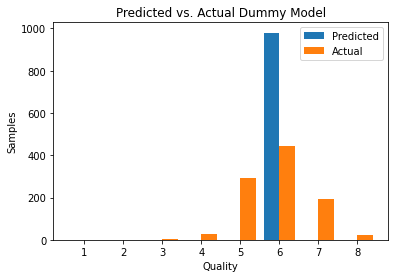

In [17]:
dummy_predicted = np.rint(dummy_regr.predict(X_test))
dummy_targets = np.rint(y_test)

pred_counts = hist_counts_pred(dummy_predicted)
targ_count = hist_counts_targ(dummy_targets)

X = [1,2,3,4,5,6,7,8]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, pred_counts, 0.4, label = 'Predicted')
plt.bar(X_axis + 0.2, targ_count, 0.4, label = 'Actual')
  
plt.xticks(X_axis, X)
plt.xlabel("Quality")
plt.ylabel("Samples")
plt.title("Predicted vs. Actual Dummy Model")
plt.legend()
plt.show()